In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, shapiro, jarque_bera, anderson
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [13]:
df = pd.read_csv('../../data/data.csv')
print(df.columns)
print(df.info())

X = df.drop(columns=["PlayerID", "EngagementLevel"])
y= df["EngagementLevel"]
X = pd.get_dummies(X, columns=['Gender', 'Location', 'GameGenre', 'GameDifficulty'], drop_first=True)

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSe

In [14]:
# Escalar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))
k_opt = 3  # el que salga del análisis real

kmeans = KMeans(
    n_clusters=k_opt,
    init='k-means++',
    n_init=50,
    max_iter=500,
    random_state=42
)

labels = kmeans.fit_predict(X_scaled)
df_clusters = df.copy()
df_clusters['Cluster'] = labels

cluster_profile = df_clusters.groupby('Cluster')[numericos_reducidos.columns].mean()
print(cluster_profile.round(2))
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids_original, columns=numericos_reducidos.columns)
print(centroids_df.round(2))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


Silhouette Score para el modelo con 3 clústeres: 0.1860493606410393


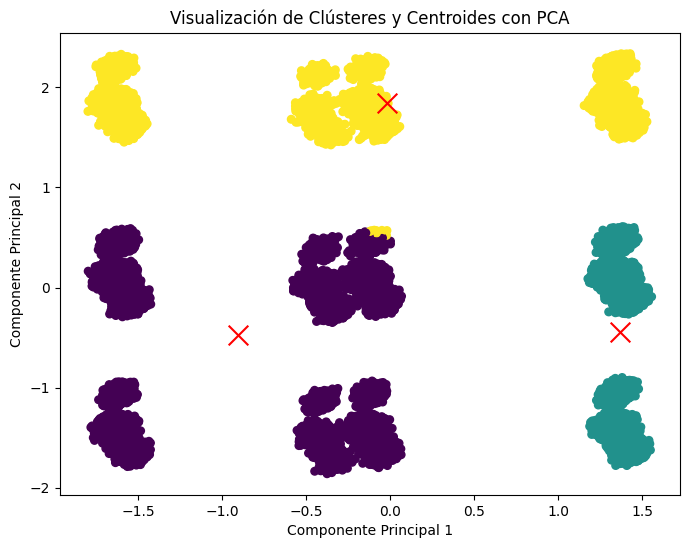

Dato 0: pertenece al clúster 0
Dato 1: pertenece al clúster 1
Dato 2: pertenece al clúster 1
Dato 3: pertenece al clúster 1
Dato 4: pertenece al clúster 0
Dato 5: pertenece al clúster 0
Dato 6: pertenece al clúster 2
Dato 7: pertenece al clúster 0
Dato 8: pertenece al clúster 0
Dato 9: pertenece al clúster 0
[[-0.90419539 -0.4759633 ]
 [ 1.36593321 -0.44549233]
 [-0.01524826  1.84753806]]
[0 1 1 ... 1 1 1]
40994.09552852243


In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# 4. Coeficiente de Silueta: Evaluar la calidad de los clústeres para diferentes valores de k
sil_scores = []  # Guardamos los coeficientes de silueta para cada k
for k in range(2, 11):  # El coeficiente de silueta solo es válido para k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)  # Calculamos el coeficiente de silueta
    sil_scores.append(sil_score)
optimal_k=3
# 6. Evaluación del modelo usando Silhouette Score con el número óptimo de clústeres
sil_score_optimal = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score para el modelo con {optimal_k} clústeres: {sil_score_optimal}")
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Visualización del clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.title('Visualización de Clústeres y Centroides con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Mostrar primeras 10 asignaciones
for i, label in enumerate(labels[:10]):
    print(f"Dato {i}: pertenece al clúster {label}")

# Ver los resultados del modelo
print(kmeans.cluster_centers_) # kmeans.cluster_centers_: Los centroides de los clústeres. Es un array que te muestra las coordenadas de cada centroide.
print(kmeans.labels_) # kmeans.labels_: Las etiquetas o clústeres asignados a cada punto de los datos. Esto te dice a qué clúster pertenece cada muestra.
print(kmeans.inertia_) # kmeans.inertia_: La suma de las distancias al cuadrado de cada punto a su centroide. Es una métrica que indica lo compactos que son los clústeres.




In [16]:
pd.crosstab(y, labels, normalize="index")


col_0,0,1,2
EngagementLevel,,,
High,0.479005,0.315306,0.205689
Low,0.480531,0.317997,0.201472
Medium,0.479199,0.323010,0.197791


In [17]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

0.0002804343903926217